In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs') 
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\keerthi\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA = df[df['job_title'] == 'Data Analyst'].copy()

In [10]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month
df_DA_Explode = df_DA.explode('job_skills')
df_pivot = df_DA_Explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)
df_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,assembly,...,watson,webex,windows,wire,word,workfront,wrike,wsl,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,51,1,128,7,1,1,0,2,3,9,...,3,6,35,0,290,0,1,0,1,11
2,53,0,90,5,3,0,2,6,3,7,...,3,3,43,1,212,0,2,1,2,8
3,43,0,78,6,6,0,0,6,2,7,...,5,4,29,3,222,0,0,0,1,11
4,35,1,93,3,1,1,1,1,0,4,...,2,1,44,4,235,1,0,0,0,3
5,37,1,67,2,4,0,0,1,2,4,...,0,2,32,0,167,0,0,0,2,2
6,42,5,69,3,1,0,2,3,1,9,...,2,1,26,2,225,0,0,0,1,4
7,48,0,68,2,1,0,1,4,0,4,...,0,1,31,2,194,0,0,0,1,3
8,57,2,73,3,0,0,0,2,2,17,...,3,1,33,2,211,0,0,0,2,5
9,25,1,58,3,1,1,0,4,4,1,...,2,0,23,3,132,0,0,0,0,5


In [17]:
df_pivot.loc['Total'] = df_pivot.sum()
df_pivot = df_pivot[df_pivot.loc['Total'].sort_values(ascending=False).index]
df_pivot = df_pivot.drop('Total')
df_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,azure,powerpoint,word,...,mxnet,chainer,heroku,debian,clojure,pascal,suse,svelte,twilio,next.js
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,2916,1820,1641,1474,1114,851,912,305,325,290,...,0,0,0,1,0,0,0,0,0,0
2,1972,1233,1140,965,805,589,580,255,229,212,...,0,0,0,0,0,0,0,0,0,0
3,1952,1243,1115,1022,808,586,556,204,221,222,...,0,0,0,0,0,0,1,0,0,0
4,1934,1222,1129,960,753,579,512,195,215,235,...,0,0,0,0,0,0,0,0,0,0
5,1844,1135,1057,886,720,558,400,183,196,167,...,0,0,0,0,0,0,0,0,0,0
6,2000,1238,1185,994,869,629,504,208,211,225,...,0,0,0,0,0,0,0,0,0,0
7,1891,1207,1142,944,773,608,454,192,194,194,...,0,0,0,0,0,1,0,0,0,1
8,2306,1537,1398,1209,1032,747,570,234,225,211,...,0,0,0,0,1,0,0,0,0,0
9,1767,1138,1041,883,808,521,426,183,127,132,...,0,0,0,0,0,0,0,0,0,0


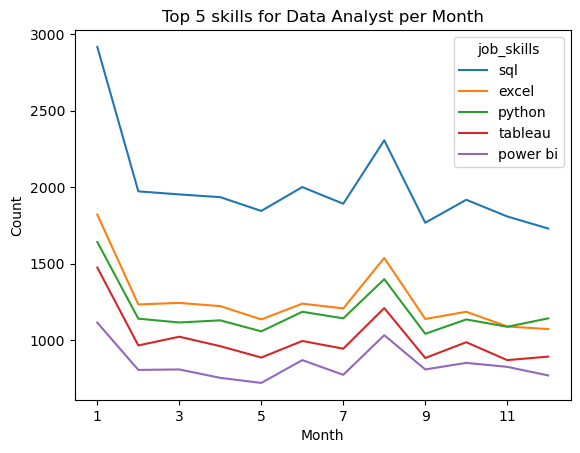

In [22]:
df_pivot.iloc[:, 0:5].plot(kind='line')
plt.title("Top 5 skills for Data Analyst per Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()